In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


filterwarnings(action='ignore')

df=pd.read_csv("winequality-red.csv")
print(df.head(5))





   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
df.sample(5)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df['goodQuality']=[1 if x >= 7 else 0 for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodQuality
681,8.0,0.45,0.23,2.20,0.094,16.0,29.0,0.99620,3.21,0.49,10.2,6,0
505,10.2,0.49,0.63,2.90,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,7,1
441,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,6,0
1126,5.8,0.29,0.26,1.70,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,6,0
229,6.9,0.52,0.25,2.60,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5,0


In [10]:
x=df.drop(['quality','goodQuality'],axis=1)
y=df['goodQuality']

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [12]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [18]:
mse=mean_squared_error(Y_test,y_pred)
print(mse)

0.08979289658713444


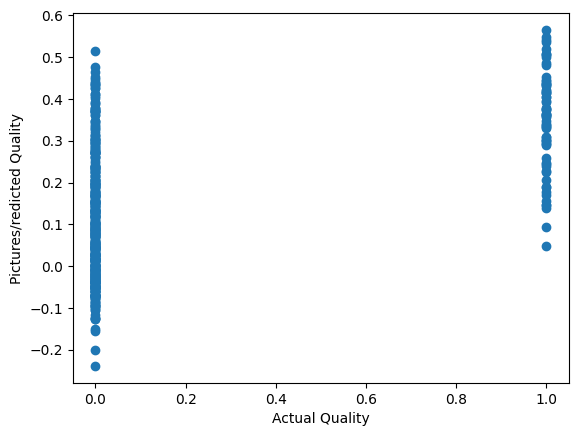

In [19]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Pictures/redicted Quality")
plt.show()